In [1]:
import os
import glob
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import multiprocessing

In [2]:
#load adata
adata = sc.read_h5ad("/Users/adiallo/Desktop/Thesis/Data_Documents/All_Data/Visium_samples/Visium_Data/samples/40_B10-18_G4_0_adata.h5ad")
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

In [3]:
adata

# Ensure the gene names match between adata.raw and adata.var_names
adata.raw = adata[:, adata.var_names].copy()

# Now set adata.raw to store the raw data
adata.raw = adata

# Save raw counts to a layer
adata.layers["raw_counts"] = adata.raw.X.copy()

<Axes: xlabel='n_genes_by_counts', ylabel='Count'>

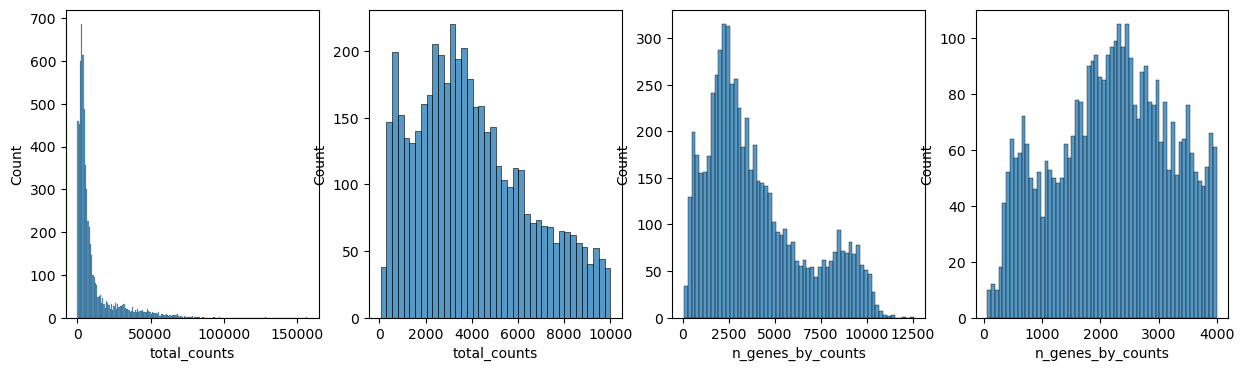

In [4]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.histplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.histplot(
    adata.obs["total_counts"][adata.obs["total_counts"] < 10000],
    kde=False,
    bins=40,
    ax=axs[1],
)
sns.histplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.histplot(
    adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000],
    kde=False,
    bins=60,
    ax=axs[3],
)

In [5]:
sc.pp.filter_cells(adata, min_counts=2)
sc.pp.filter_cells(adata, max_counts=70000)
adata = adata[adata.obs["pct_counts_mt"] < 20].copy()
print(f"#cells after MT filter: {adata.n_obs}")
sc.pp.filter_genes(adata, min_cells=1)

#cells after MT filter: 6287


In [6]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

In [22]:
import multiprocessing
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.tsne(adata, n_pcs=50)
sc.tl.umap(adata)
sc.tl.leiden(
    adata, key_added="clusters", flavor="igraph", directed=False, n_iterations=2
)

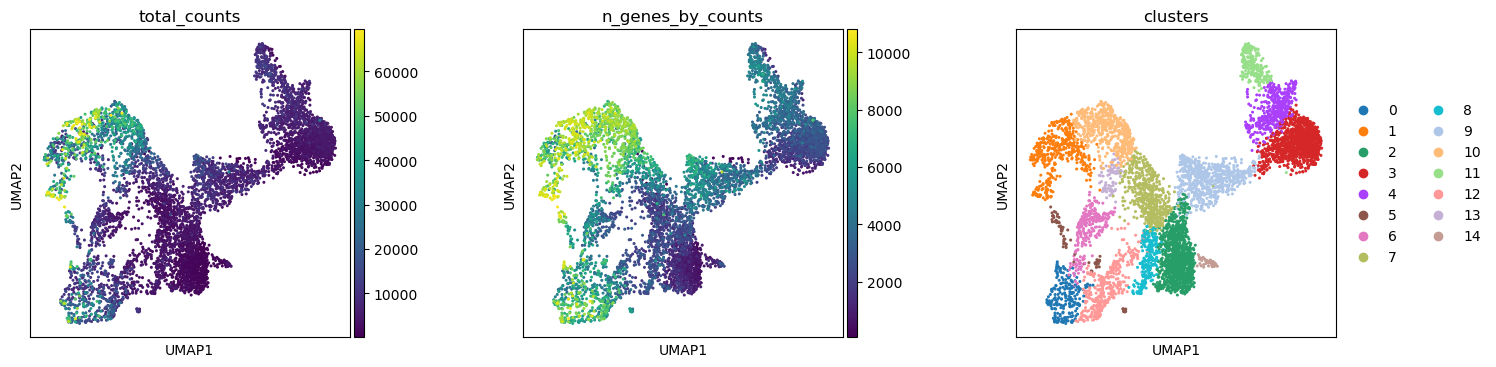

In [9]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "clusters"], wspace=0.4)

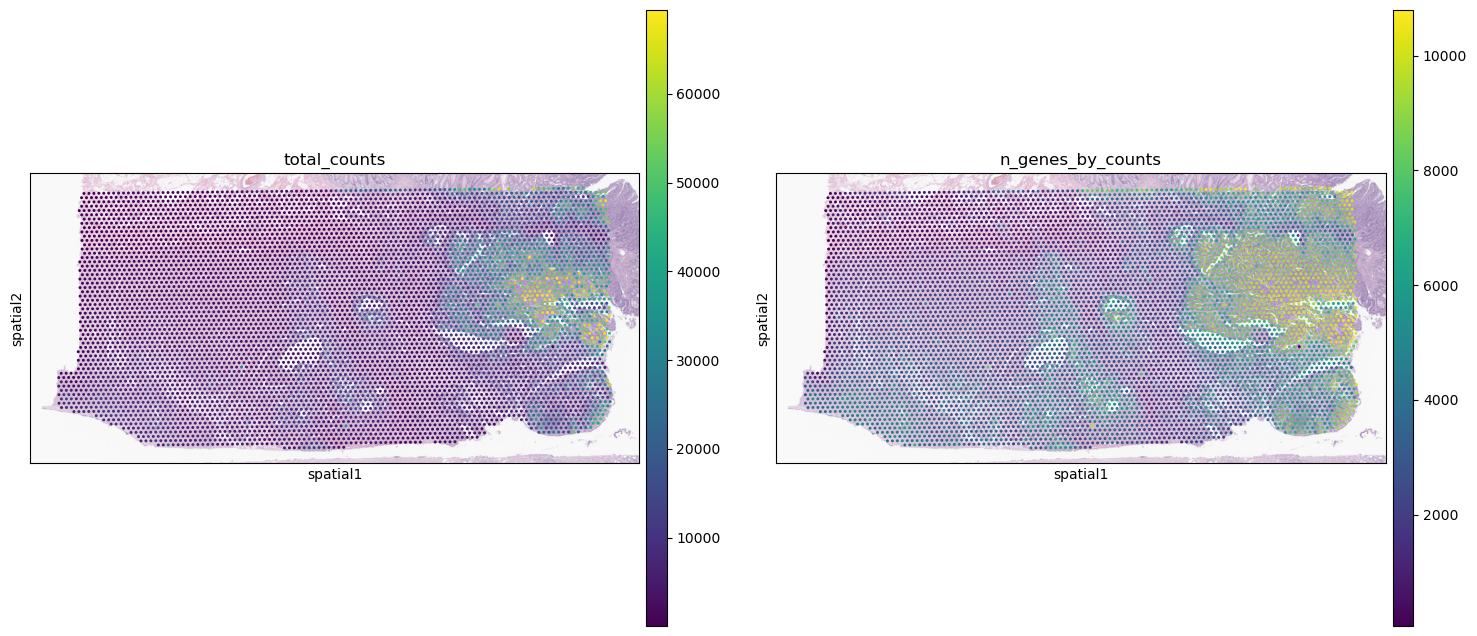

In [10]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img_key="hires", color=["total_counts", "n_genes_by_counts"])

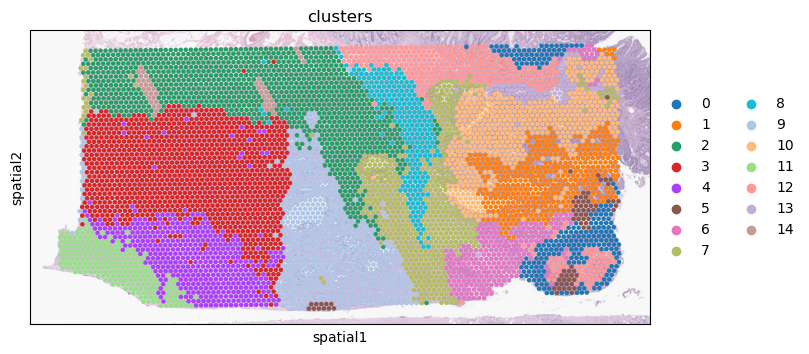

In [11]:
sc.pl.spatial(adata, img_key="hires", color="clusters", size=1.5)

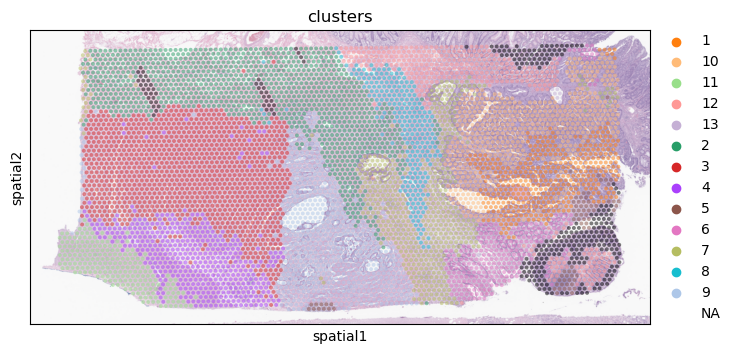

In [12]:
sc.pl.spatial(
    adata,
    img_key="hires",
    color="clusters",
    groups=["1", "2","3", "4","5", "6","7", "8","9", "10","11", "12","13"],
    alpha=0.5,
    size=1.3,
)

categories: 0, 1, 2, etc.
var_group_labels: 9


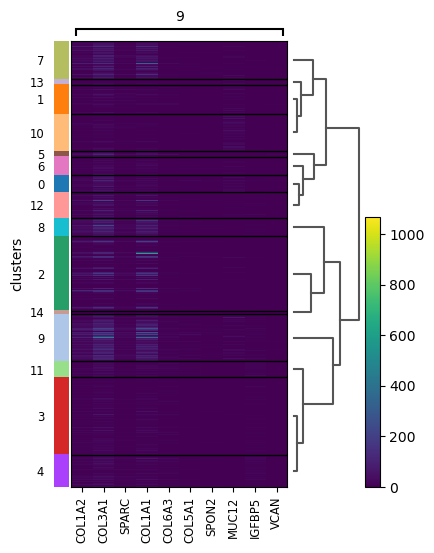

In [13]:
sc.tl.rank_genes_groups(adata, "clusters", method="t-test")
sc.pl.rank_genes_groups_heatmap(adata, groups="9", n_genes=10, groupby="clusters")

In [14]:
#sc.pp.normalize_total(adata, target_sum=1e4)  # Normalization
sc.pp.scale(adata)  # Scaling

In [15]:
adata.layers["counts"] = adata.X.copy()
# Save normalized counts (after normalization but before scaling)
adata.layers["normalized_counts"] = adata.X.copy()

# Save scaled counts (after scaling)
adata.layers["scaled_counts"] = adata.X.copy()

In [16]:
print(adata.X)


[[ 0.49860835 -0.5427173  -0.3030623  ... -0.1391505   0.01778471
   0.2176703 ]
 [-0.30039933  0.03325544  1.1910278  ... -0.1391505  -0.68975276
  -0.4016618 ]
 [-0.30039933 -0.5427173  -0.3030623  ... -0.1391505  -0.68975276
  -0.4016618 ]
 ...
 [-0.30039933 -0.5427173   4.4232755  ... -0.1391505  -0.68975276
  -0.4016618 ]
 [-0.30039933 -0.5427173  -0.3030623  ... -0.1391505   1.698697
  -0.4016618 ]
 [-0.30039933 -0.5427173   2.727516   ... -0.1391505  -0.68975276
   3.022371  ]]


In [17]:
print(adata.layers["counts"])

[[ 0.49860835 -0.5427173  -0.3030623  ... -0.1391505   0.01778471
   0.2176703 ]
 [-0.30039933  0.03325544  1.1910278  ... -0.1391505  -0.68975276
  -0.4016618 ]
 [-0.30039933 -0.5427173  -0.3030623  ... -0.1391505  -0.68975276
  -0.4016618 ]
 ...
 [-0.30039933 -0.5427173   4.4232755  ... -0.1391505  -0.68975276
  -0.4016618 ]
 [-0.30039933 -0.5427173  -0.3030623  ... -0.1391505   1.698697
  -0.4016618 ]
 [-0.30039933 -0.5427173   2.727516   ... -0.1391505  -0.68975276
   3.022371  ]]


In [18]:
# Create or calculate matrices as needed (for example, if you had them from another source)
counts_matrix = adata.X.copy()  # or another source
normalized_matrix = adata.X.copy()  # after normalization
scaled_matrix = adata.X.copy()  # after scaling


adata.layers["counts"] = counts_matrix
adata.layers["normalized_counts"] = normalized_matrix
adata.layers["scaled_counts"] = scaled_matrix

In [24]:
# Save the AnnData object to a file
adata.write("/Users/adiallo/Desktop/Thesis/Data_Documents/All_Data/Visium_samples/Visium_Data/samples/40_B10-18_G4_0_2_adata.h5ad")

In [20]:
import scipy.sparse 

# Assuming your counts_matrix, normalized_matrix, scaled_matrix are already numpy arrays or sparse matrices
adata.layers["counts"] = scipy.sparse.csr_matrix(counts_matrix)
adata.layers["normalized_counts"] = scipy.sparse.csr_matrix(normalized_matrix)
adata.layers["scaled_counts"] = scipy.sparse.csr_matrix(scaled_matrix)

adata.write("/Users/adiallo/Desktop/Thesis/Data_Documents/All_Data/Visium_samples/Visium_Data/samples/40_B10-18_G4_0_2_adata.h5ad")

In [21]:
import numpy as np
import os

# Directory path
dir_path = "/Users/adiallo/Desktop/Thesis/Data_Documents/All_Data/Visium_samples/Visium_Data/samples/"

# File paths for saving the matrices
counts_matrix_path = os.path.join(dir_path, "counts_matrix.npy")
normalized_matrix_path = os.path.join(dir_path, "normalized_matrix.npy")
scaled_matrix_path = os.path.join(dir_path, "scaled_matrix.npy")

# Assuming adata is already loaded and contains the layers
# Saving the matrices to .npy files
np.save(counts_matrix_path, adata.layers["counts"].toarray())
np.save(normalized_matrix_path, adata.layers["normalized_counts"].toarray())
np.save(scaled_matrix_path, adata.layers["scaled_counts"].toarray())

In [22]:
print(adata.obsm['X_tsne'])

[[  7.653494   59.58711  ]
 [ 78.82619    25.485909 ]
 [  4.8703847 -38.881466 ]
 ...
 [ 20.484262  -19.04659  ]
 [  6.9061794 -29.164103 ]
 [-19.937456   -7.599387 ]]


In [23]:
import pandas as pd

# Convert t-SNE results to a DataFrame
tsne_df = pd.DataFrame(adata.obsm['X_tsne'], columns=['tsne1', 'tsne2'])
tsne_df['barcodes'] = adata.obs_names  # Add barcodes if needed

# Save the DataFrame as a CSV file
tsne_df.to_csv("/Users/adiallo/Desktop/Thesis/Data_Documents/All_Data/Visium_samples/Visium_Data/samples/tsne_coordinates.csv", index=False)

In [23]:
import pandas as pd

# Extract t-SNE data and the corresponding barcodes
tsne_df = pd.DataFrame(
    {
        "barcodes": adata.obs_names,
        "tsne1": adata.obsm["X_tsne"][:, 0],
        "tsne2": adata.obsm["X_tsne"][:, 1],
    }
)

# Save the t-SNE data as a CSV file
tsne_df.to_csv("/Users/adiallo/Desktop/Thesis/Data_Documents/All_Data/Visium_samples/Visium_Data/samples/tsne_coordinates.csv", index=False)

In [21]:
print(adata.obsm.keys())


KeysView(AxisArrays with keys: spatial, X_pca, X_umap)


In [25]:
print(adata)

AnnData object with n_obs × n_vars = 6287 × 17795
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'clusters'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'spatial', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'clusters', 'clusters_colors', 'rank_genes_groups', 'dendrogram_clusters', 'tsne'
    obsm: 'spatial', 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'
    layers: 'raw_counts', 'counts', 'normalized_counts', 'scaled_counts'
    obsp: 'distances', 'connectivities'


In [26]:
print(adata.obs.head())

                   in_tissue array_row array_col  n_genes_by_counts  \
AACAATGGAACCACAT-1         1        54        32               8007   
AACACCAGCCTACTCG-1         1        31        39               7733   
AACACCATACGATAGT-1         1         4       154                591   
AACACCATTCGCATAC-1         1        53       139               2841   
AACACCGAATGTCTCA-1         1        34       176               2943   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AACAATGGAACCACAT-1                 8.988196       23775.0           10.076432   
AACACCAGCCTACTCG-1                 8.953381       26140.0           10.171260   
AACACCATACGATAGT-1                 6.383507         677.0            6.519147   
AACACCATTCGCATAC-1                 7.952263        4388.0            8.386857   
AACACCGAATGTCTCA-1                 7.987524        4850.0            8.486940   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AACAATG

In [31]:
hires_image = spatial_data['40_B10-18_G4']['images']['hires']

In [30]:
print(spatial_data['40_B10-18_G4'].keys())

dict_keys(['images', 'metadata', 'scalefactors'])


In [32]:
import matplotlib.pyplot as plt
plt.imsave('/Users/adiallo/Desktop/Thesis/Data_Documents/All_Data/Visium_samples/Visium_Data/samples/hires_image.png', hires_image)